In [1]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df = pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [2]:
def clean_1(s):
    s = s.replace('ðŸž', "")
    s = s.replace('ðŸ¤·â€â™', "")
    s = s.replace("ðŸ”´", "")
    s = s.replace("€™", "")
    s = s.replace("ƒ¼", "")
    s = s.replace("â€˜", "")
    s = s.replace("â€™", "")
    s = s.replace("ðŸ˜˜", "")
    s = s.replace("ðŸ”Š", "")
    s = s.replace("&amp;", "&")
    s = s.replace("ðŸ§©", "")
    s = s.replace(":", "")
    s = s.replace(";", "")
    s = s.replace("'", "")
    s = s.replace("|", "")
    s = s.replace("//", "")
    s = s.replace('📍',"")
    s = s.replace('🏫',"")
    s = s.replace('💯',"")
    s = s.replace('🧵',"")
    s = s.replace('🔊',"")
    s = s.replace("●", "")
    s = s.replace("❤️", "")
    s = s.replace("🙃", "")
    s = s.replace("🤔", "")
    s = s.replace("😉", "")
    s = s.replace("⬇️", "")
    s = s.replace("🔴", "")
    s = s.replace("🤷‍", "")
    s = s.replace("🐞", "")
    s = s.replace("🚨", "")
    s = s.replace("🙌", "")
    s = s.replace("👑", "")
    s = s.replace("🔥", "")
    s = s.replace("👇", "")
    return str(s)
df["text_clean"] = ''
for i, row in df.iterrows():
    df.at[i, "text_clean"] = clean_1(row.text)


In [3]:
to_drop = ['user_name','user_created','user_description','user_verified','text','is_retweet']


df.drop(to_drop, inplace=True, axis=1)

def clean_2(s):
    s = str(s).upper()
    s = s.replace("[", "")
    s = s.replace("]", "")
    s = s.replace("'", "")
    s = s.replace("CORONAVIRUS","COVID19")
    s = s.replace("CORONAVIRUS, COVID19","COVID19")
    s = s.replace("COVID19, COVID19","COVID19")
    
    return str(s).upper()
df["hashtags_clean"] = ''
for i, row in df.iterrows():
    df.at[i, "hashtags_clean"] = clean_2(row.hashtags)


In [4]:
df.head()

,user_location,user_followers,user_friends,user_favourites,date,hashtags,source,text_clean,hashtags_clean
0,astroworld,624,950,18775,2020-07-25 12:27:21,NaN,Twitter for iPhone,If I smelled the scent of hand sanitizers toda...,NAN
1,"New York, NY",2253,1677,24,2020-07-25 12:27:17,NaN,Twitter for Android,Hey @Yankees @YankeesPR and @MLB - wouldnt it ...,NAN
2,"Pewee Valley, KY",9275,9525,7254,2020-07-25 12:27:14,['COVID19'],Twitter for Android,@diane3443 @wdunlap @realDonaldTrump Trump nev...,COVID19
3,Stuck in the Middle,197,987,1488,2020-07-25 12:27:10,['COVID19'],Twitter for iPhone,@brookbanktv The one gift #COVID19 has give me...,COVID19
4,Jammu and Kashmir,101009,168,101,2020-07-25 12:27:08,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,25 July Media Bulletin on Novel #CoronaVirusU...,"COVID19UPDATES, COVID19"


In [5]:
print(df.groupby('hashtags').size())

hashtags
['100Days', 'COVID19', 'LawAndOrder', 'economy']                                         1
['100Days', 'COVID19', 'TeamBiden']                                                      1
['100Days', 'COVID19', 'coronavirus']                                                    1
['100Days', 'COVID19']                                                                   1
['100Days', 'Trump']                                                                     1
                                                                                        ..
['新型コロナウイルス', 'COVID19', 'StayHome']                                                     3
['日本', '新型コロナウイルス', 'covid19', 'japan', 'Tokyo', 'GoTo予算を医療に回せ']                         1
['沖縄', '新型コロナウイルス']                                                                      1
['親子丼', 'oyakodon', 'StayathomeAustralia', 'wellbeingjourney', 'selfcare', 'covid19']    1
['코로나시대의캠핑', '홈캠핑', '베란다캠핑']                                                     

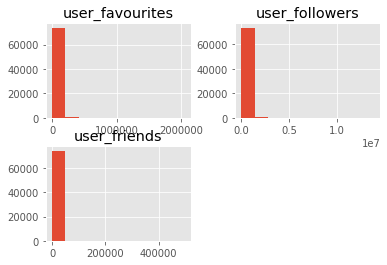

In [6]:
df.drop(['hashtags'],1).hist()
plt.show()

In [9]:
X = np.array(df[["user_friends","user_followers","user_favourites"]])
y = np.array(df['hashtags'])
X.shape

(74436, 3)

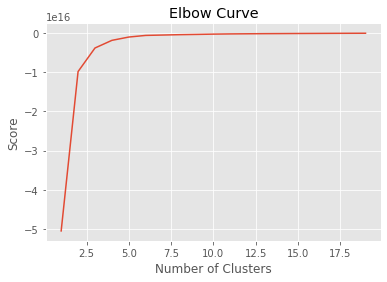

In [10]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.17754637e+03 1.83148000e+04 1.55150189e+04]
 [7.68970414e+02 6.23958658e+06 2.73377515e+03]
 [2.19937888e+02 1.30086912e+07 8.03913043e+01]
 [1.20131633e+03 1.88081638e+06 4.97820554e+03]]


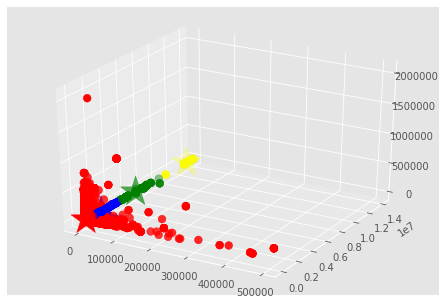

In [14]:
#Prediciendo clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','yellow','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

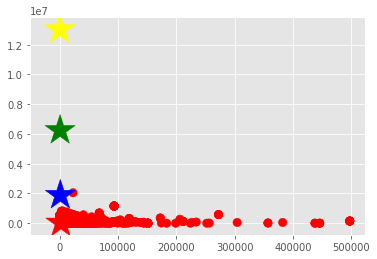

In [15]:
# Getting the values and plotting it
f1 = df['user_friends'].values
f2 = df['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

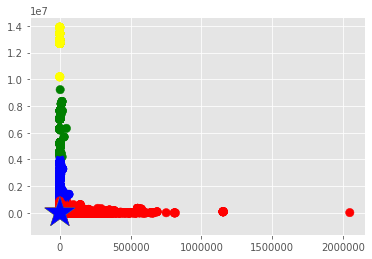

In [16]:
# Getting the values and plotting it
f1 = df['user_favourites'].values
f2 = df['user_followers'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

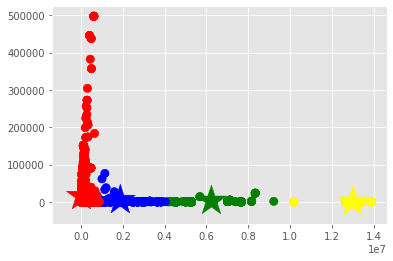

In [17]:
f1 = df['user_followers'].values
f2 = df['user_friends'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [18]:
copy =  pd.DataFrame()
copy['date']=df['date'].values
copy['hashtags']=df['hashtags'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73082
1,green,507
2,yellow,161
3,blue,686


In [19]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['hashtags']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('hashtags').size()
diversidadGrupo

,hashtags,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [20]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([49234,  2851, 70675, 72372], dtype=int64)

In [21]:
users=df['date'].values
for row in closest:
    print(users[row])

2020-07-31 17:56:00
2020-07-25 10:46:10
2020-08-04 05:50:00
2020-08-04 04:35:02


In [22]:
X_new = np.array([[45.92,57.74,15.66]]) 
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


In [28]:
newdf = df.copy()
newdf = newdf.drop(['date','source','hashtags','hashtags_clean','user_location','text_clean'], axis=1)
print(newdf.head())

   user_followers  user_friends  user_favourites
0             624           950            18775
1            2253          1677               24
2            9275          9525             7254
3             197           987             1488
4          101009           168              101


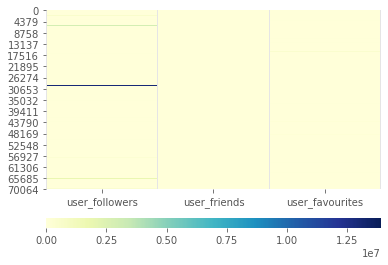

In [29]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sb.heatmap(newdf, cmap="YlGnBu", ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
plt.show()